# iQuHACK 2026 Challenge - Superquantum

In [65]:
from qiskit import QuantumCircuit, qasm3
import math
import mpmath
from pygridsynth.gridsynth import gridsynth_gates

In [ ]:
def gridsynth_string(theta, epsilon=1E-10):
    return gridsynth_gates(theta, epsilon)

def apply_gate_sequence(qc, qubit, gates: str):
    gateset = 
    for g in gates:

    

In [47]:
from __future__ import annotations

import math
from typing import Optional

from qiskit import QuantumCircuit
from pygridsynth.gridsynth import gridsynth_gates

def apply_approx_rz(qc: QuantumCircuit, theta, qubit: int, epsilon=mpmath.mpf("1e-10")) -> str:
    """
    Append a Clifford+T approximation to Rz(theta) onto an existing Qiskit circuit,
    using pygridsynth as the synthesis subroutine.

    Args:
        qc: Target QuantumCircuit (modified in place).
        theta: Rotation angle in radians.
        qubit: Index of the qubit to rotate.
        epsilon: Allowed operator-norm error tolerance passed to gridsynth.
        apply_global_phase: If True, apply trailing 'W' symbols as circuit global phase
                           increments of +pi/4. If False, ignore 'W' (often fine).

    Returns:
        The raw gridsynth gate string (in gridsynth/matrix order).
    """
    # gridsynth_gates expects strings in the example usage
    
    gate_str = gridsynth_gates(theta,epsilon)

    # gridsynth outputs in matrix (right-to-left) order, so reverse for circuit order
    # (apply the rightmost symbol first) :contentReference[oaicite:2]{index=2}
    seq = reversed(gate_str.strip())

    def append_x_via_allowed_set():
        # X = H Z H, and Z = S^2  =>  X = H S S H
        qc.h(qubit)
        qc.s(qubit)
        qc.s(qubit)
        qc.h(qubit)

    for g in seq:
        if g == "H":
            qc.h(qubit)
        elif g == "T":
            qc.t(qubit)
        elif g in ("t",):  # robustness: treat lowercase t as T† if it ever appears
            qc.tdg(qubit)
        elif g == "S":
            qc.s(qubit)
        elif g in ("s",):  # robustness: treat lowercase s as S† if it ever appears
            qc.sdg(qubit)
        elif g == "X":
            # Not in your primitive set, so decompose
            append_x_via_allowed_set()
        elif g == "W":
            pass
        else:
            raise ValueError(f"Unknown gridsynth gate symbol: {g!r}")

    return gate_str

def apply_approx_crz(qc, theta, control, target, epsilon=mpmath.mpf("1e-10")):
    apply_approx_rz(qc, theta/2, target, epsilon)
    qc.cx(control, target)
    apply_approx_rz(qc, -theta/2, target, epsilon)
    qc.cx(control, target)
    
def apply_approx_cry(qc, theta, control, target, epsilon=mpmath.mpf("1e-10")):
    # apply Rx(pi/2) to target
    qc.h(target)
    qc.s(target)
    qc.h(target)

    apply_approx_crz(qc, theta, control, target, epsilon)
    
    # apply Rx(-pi/2) to target
    qc.h(target)
    qc.sdg(target)
    qc.h(target)

In [2]:
def save_qasm(qc, output="qc.qasm3"):
    qasm3_str = qasm3.dumps(qc)
    
    print("OpenQASM 3 Output:\n")
    print(qasm3_str)
    
    with open(output, "w") as file:
        file.write(qasm3_str)

    print(f"\nCircuit successfully saved to {output}")

## Problem 01

Exploiting, $Y = SXS^\dagger$, we have $CY = (I \otimes S)CX(I \otimes S^\dagger) = (I \otimes T^2)CX(I \otimes {T^\dagger}^2)$

In [58]:
qc1 = QuantumCircuit(2)

qc1.sdg(0)
qc1.cx(1,0)
qc1.s(0)
qc1.global_phase = math.pi

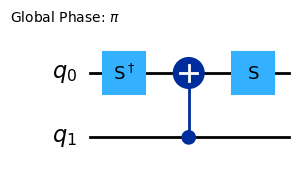

In [59]:
qc1.draw("mpl")

In [60]:
save_qasm(qc1, "problem01.qasm3")

OpenQASM 3 Output:

OPENQASM 3.0;
include "stdgates.inc";
qubit[2] q;
sdg q[0];
cx q[1], q[0];
s q[0];


Circuit successfully saved to problem01.qasm3


## Problem 02

$CR_y(\theta) = R_x(\frac \pi2) CR_z(\theta) R_x(\frac \pi2)^\dagger$

$R_x(\frac \pi2) = HSH$

$CR_z(\theta) = (R_z(\frac \theta2) \otimes I) CX (R_z(-\frac \theta2) \otimes I) CX$

In [98]:
qc2 = QuantumCircuit(2)
theta = mpmath.mp.pi / 7

apply_approx_cry(qc2,theta,1,0)

<class 'mpmath.ctx_mp_python.mpf'>


In [99]:
qc2.count_ops()

OrderedDict([('h', 134), ('t', 124), ('s', 75), ('cx', 2), ('sdg', 1)])

In [100]:
save_qasm(qc2, "problem02.qasm3")

OpenQASM 3 Output:

OPENQASM 3.0;
include "stdgates.inc";
qubit[2] q;
h q[0];
s q[0];
h q[0];
h q[0];
s q[0];
s q[0];
h q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h 

## Problem 03

$Z \otimes Z = CX (I \otimes Z) CX$

$\implies e^{-i \theta t Z \otimes Z} = CX(I \otimes R_z(2\theta t))CX$

$\implies e^{i \theta t Z \otimes Z} = CX(I \otimes R_z(-2\theta t))CX$

In [176]:
qc3 = QuantumCircuit(2)
theta = mpmath.mp.pi / 7

qc3.cx(1,0)
apply_approx_rz(qc3,-2*theta,0)
qc3.cx(1,0)

In [102]:
qc3.count_ops()

OrderedDict([('h', 64), ('t', 64), ('s', 29), ('cx', 2)])

In [103]:
save_qasm(qc3, "problem03.qasm3")

OpenQASM 3 Output:

OPENQASM 3.0;
include "stdgates.inc";
qubit[2] q;
cx q[1], q[0];
s q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q

## Problem 04

Use the fact that $X \otimes X$ and $Y \otimes Y$ commute (the sign flips in both qubits cancel).

$e^{i \theta t X \otimes X} = (H \otimes H) e^{i \theta t Z \otimes Z} (H \otimes H) = (H \otimes H)CX(I \otimes R_z(-2\theta t))CX (H \otimes H)$

$e^{i \theta t Y \otimes Y} = (S \otimes S) e^{i \theta t X \otimes X} (S^\dagger \otimes S^\dagger)$

In [104]:
qc4 = QuantumCircuit(2)
theta = mpmath.mp.pi / 7

# exp XX
qc4.h((0,1))

qc4.cx(1,0)
apply_approx_rz(qc4,-2*theta,0)
qc4.cx(1,0)

qc4.h((0,1))

# exp YY
qc4.sdg((0,1))
qc4.h((0,1))

qc4.cx(1,0)
apply_approx_rz(qc4,-2*theta,0)
qc4.cx(1,0)

qc4.h((0,1))
qc4.s((0,1))

In [105]:
qc4.count_ops()

OrderedDict([('h', 222), ('t', 212), ('s', 104), ('cx', 4), ('sdg', 2)])

In [106]:
save_qasm(qc4, "problem04.qasm3")

OpenQASM 3 Output:

OPENQASM 3.0;
include "stdgates.inc";
qubit[2] q;
h q[0];
h q[1];
cx q[1], q[0];
s q[0];
s q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q[0];
h q[0];
t q[0];
h q[0];
t q[0];
h q[0];
s q[0];
t q

## Problem 05

This circuit should just be the identity with a global phase $i I$.

$X \otimes X$, $Y \otimes Y$, $Z \otimes Z$ commute pairwise so the exponential of the sum is the product of the exponentials of the summands. $\exp(i\frac \pi2 X \otimes X) = i \sin(\frac \pi2) X \otimes X = i X \otimes X$, analogously for $Y, Z$.


In [125]:
qc5 = QuantumCircuit(2)

theta = mpmath.mp.pi/2

# ZZ
qc5.cx(1,0)
apply_approx_rz(qc5,-2*theta,0)
qc5.cx(1,0)

qc5.cx(1,0)
apply_approx_rz(qc5,-2*theta,0)
qc5.cx(1,0)

#global phase
qc5.s(0)

qc5.h(0)
qc5.s(0)
qc5.s(0)
qc5.h(0)

qc5.s(0)

qc5.h(0)
qc5.s(0)
qc5.s(0)
qc5.h(0)

# ZZ
qc5.cx(1,0)
apply_approx_rz(qc5,-2*theta,0)
qc5.cx(1,0)

qc5.cx(1,0)
apply_approx_rz(qc5,-2*theta,0)
qc5.cx(1,0)

In [136]:
qc5 = QuantumCircuit(2)

# global phase -i
for _ in range(3):
    qc5.s(0)
    
    qc5.h(0)
    qc5.s(0)
    qc5.s(0)
    qc5.h(0)
    
    qc5.s(0)
    
    qc5.h(0)
    qc5.s(0)
    qc5.s(0)
    qc5.h(0)

In [137]:
save_qasm(qc5, "problem05.qasm3")

OpenQASM 3 Output:

OPENQASM 3.0;
include "stdgates.inc";
qubit[2] q;
s q[0];
h q[0];
s q[0];
s q[0];
h q[0];
s q[0];
h q[0];
s q[0];
s q[0];
h q[0];
s q[0];
h q[0];
s q[0];
s q[0];
h q[0];
s q[0];
h q[0];
s q[0];
s q[0];
h q[0];
s q[0];
h q[0];
s q[0];
s q[0];
h q[0];
s q[0];
h q[0];
s q[0];
s q[0];
h q[0];


Circuit successfully saved to problem05.qasm3


## Problem 08

We observe that this unitary is just $QFT^\dagger$, the inverse Quantum Fourier Transformation on $2$ qubits.

In [164]:
from qiskit.circuit.library import QFT

qc8 = QuantumCircuit(2)

# apply QFTDG
#qc8.compose(QFT(2, inverse=True, do_swaps=True), inplace=True)

q0, q1 = 0, 1
# swap
qc8.cx(0,1)
qc8.cx(1,0)
qc8.cx(0,1)
qc8.h(q0)

# CSdg
qc8.tdg(q0)
qc8.cx(q0, q1)
qc8.t(q1)
qc8.cx(q0, q1)
qc8.tdg(q1)

qc8.h(q1)

In [ ]:
# phase -1
for _ in range(1):
    qc8.s(0)
    
    qc8.h(0)
    qc8.s(0)
    qc8.s(0)
    qc8.h(0)
    
    qc8.s(0)
    
    qc8.h(0)
    qc8.s(0)
    qc8.s(0)
    qc8.h(0)

In [165]:
save_qasm(qc8, "problem08.qasm3")

OpenQASM 3 Output:

OPENQASM 3.0;
include "stdgates.inc";
qubit[2] q;
cx q[0], q[1];
cx q[1], q[0];
cx q[0], q[1];
h q[0];
tdg q[0];
cx q[0], q[1];
t q[1];
cx q[0], q[1];
tdg q[1];
h q[1];


Circuit successfully saved to problem08.qasm3


## Problem 09

In [171]:
def ch_from_cnot_t_s_h(qc: QuantumCircuit, control: int, target: int):
    """
    Implement controlled-H using only {cx, t, s, h} (and repeats thereof).
    Uses:
      Sdg = S^3
      Tdg = T^7
    Decomposition (c=control, t=target), in time order:
      c: Sdg
      t: S
      cx(c,t)
      t: Tdg; H
      cx(c,t)
      t: Sdg; H; T
    """
    # c: S† = S^3
    qc.s(control)
    qc.s(control)
    qc.s(control)

    # t: S
    qc.s(target)

    # CNOT
    qc.cx(control, target)

    # t: T† = T^7, then H
    for _ in range(7):
        qc.t(target)
    qc.h(target)

    # CNOT
    qc.cx(control, target)

    # t: S† = S^3, then H, then T
    qc.s(target)
    qc.s(target)
    qc.s(target)
    qc.h(target)
    qc.t(target)

In [174]:
qc9 = QuantumCircuit(2)

q0, q1 = 1, 0

qc9.s((0,1))

# controlled H

# phase
for _ in range(3):
    qc9.t(q0)

# controlled H
ch_from_cnot_t_s_h(qc9, q0, q1)

# swap
qc9.cx(0,1)
qc9.cx(1,0)
qc9.cx(0,1)

In [175]:
save_qasm(qc9, "problem09.qasm3")

OpenQASM 3 Output:

OPENQASM 3.0;
include "stdgates.inc";
qubit[2] q;
s q[0];
s q[1];
t q[1];
t q[1];
t q[1];
s q[1];
s q[1];
s q[1];
s q[0];
cx q[1], q[0];
t q[0];
t q[0];
t q[0];
t q[0];
t q[0];
t q[0];
t q[0];
h q[0];
cx q[1], q[0];
s q[0];
s q[0];
s q[0];
h q[0];
t q[0];
cx q[0], q[1];
cx q[1], q[0];
cx q[0], q[1];


Circuit successfully saved to problem09.qasm3


In [11]:
from pygridsynth.gridsynth import gridsynth_gates

theta = "0.5"
epsilon = "1e-10"
gates = gridsynth_gates(theta, epsilon)
print(gates)

HTSHTSHTHTSHTSHTHTHTHTSHTHTHTHTHTHTSHTSHTSHTHTHTSHTSHTHTHTSHTSHTSHTHTSHTSHTHTHTSHTHTHTSHTHTSHTSHTHTSHTSHTHTHTHTSHTHTSHTSHTHTSHTSHTSHTHTSHTSHTHTHTHTHTHTHTSHTHTSHTSHTSHTHTHTSHTHTSHTSHTSHTSHTSHTSHTSHTHTSHTSHTSHTHTSHTHTSHTSHTHTHTHTSHTSHTSHTSHTSHTHTSHTSHTHTSHTHTHTHXWW
